In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns

In [59]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
import warnings 
warnings.filterwarnings('ignore')

In [60]:
##LOADING THE DATA
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,Gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   Gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# # Observation :
1. there are 167 observation and 10 columns in the data 
2. all the columns have 167 non-null values , i.e. there is no missing values 
3. all the columns except the country name is numerical 

In [62]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

# EDA

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
Gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [64]:
df_new = df.drop(columns=['country'])

In [65]:
df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,Gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [66]:
## Scaling the data and storing the output as a new dataframe \

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_new),columns =df_new.columns)

In [67]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-2.659217e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.383323e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.218713e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.871954e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.512288e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,3.988825e-18,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.616535e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.124580e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
Gdpp,167.0,2.127373e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


In [68]:
df_scaled_copy = df_scaled.copy(deep=True)

# # K-Means Clustering 

In [110]:
#Empty dictionary to store the SSE for each value of X
sse = {}

for k in range (1 , 10):
    kmeans = KMeans(n_clusters = k , random_state=1).fit(df_scaled)
    
    sse[k] = kmeans.inertia_
    

In [70]:
sse

{1: 1503.0000000000002,
 2: 1050.2145582853304,
 3: 831.4244352086873,
 4: 700.5205369722204,
 5: 632.3942572883417,
 6: 561.9730189822593,
 7: 497.1039387885759,
 8: 457.2918671678082,
 9: 430.141022132182}

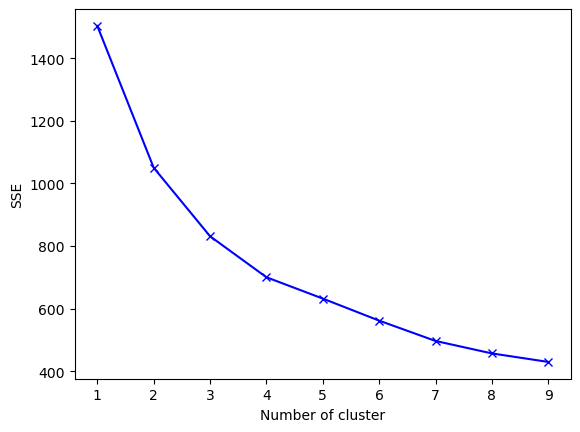

In [71]:
#Elbow plot
plt.figure()

plt.plot(list(sse.keys()),list(sse.values()), 'bx-')

plt.xlabel('Number of cluster')

plt.ylabel('SSE')

plt.show()

# Observation :
1. we can see from the plot that there is a connsistent dip from 2 to 8 and there dosent seem to be a clear elbow here 
2. So, lets look at another method to get a 'second opinion'

In [109]:
#Empty dictionary to store the silhouette score for each value of X
sc = {}

for k in range (2 , 10):
    kmeans = KMeans(n_clusters = k , random_state=1).fit(df_scaled)
    
    labels = kmeans.predict(df_scaled)
    
    sc[k] = silhouette_score(df_scaled, labels)
    

In [73]:
sc

{2: 0.28735668921406704,
 3: 0.28329575683463126,
 4: 0.2959517057752815,
 5: 0.2175075087297438,
 6: 0.22349456512610177,
 7: 0.24838173573976768,
 8: 0.23956710511676946,
 9: 0.25183114111487986}

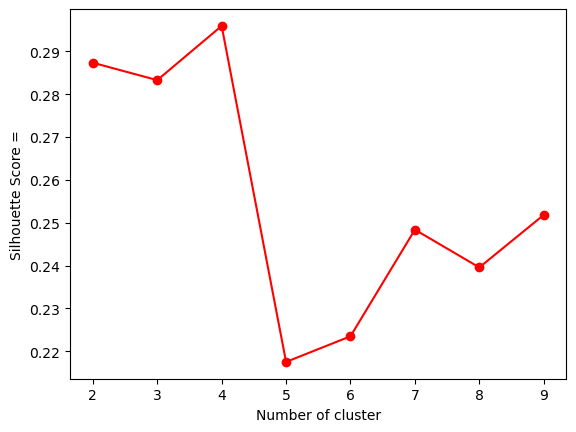

In [74]:
#Elbow plot
plt.figure()

plt.plot(list(sc.keys()),list(sc.values()), 'ro-')

plt.xlabel('Number of cluster')

plt.ylabel('Silhouette Score =')

plt.show()

# Observation 
   we observe from the plot that the silhouette score is the higgest for k+3 . 

In [75]:
kmeans =KMeans(n_clusters=3 , random_state = 1)
kmeans.fit(df_scaled)

df_scaled_copy['KMeans_Labels'] = kmeans.predict(df_scaled)
df['KMeans_Labels'] = kmeans.predict(df_scaled)

In [76]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,Gdpp,KMeans_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [77]:
df['KMeans_Labels'].value_counts()

1    84
0    47
2    36
Name: KMeans_Labels, dtype: int64

# Observation
it look like very skewed clustering , with only three obervations in one cluster and more than a hundred in another 

In [111]:
## Calculating the mean and the median of the original data of each label 
mean = df.groupby('KMeans_Labels').mean()
median  = df.groupby('KMeans_Labels').median()

d_kmeans = pd.concat([mean , median] , axis = 0)
d_kmeans.index = ['0 Mean' , '1 Mean' , '2 Mean'  , 'developing Median' , 'poor Median' , 'developed median']
d_kmeans.T

,0 Mean,1 Mean,2 Mean,developing Median,poor Median,developed median
child_mort,92.961702,21.927381,5.000000,90.20,18.350,4.200
exports,29.151277,40.243917,58.738889,23.80,37.300,50.350
health,6.388511,6.200952,8.807778,5.66,5.930,9.445
imports,42.323404,47.473404,51.491667,40.30,48.650,39.050
income,3942.404255,12305.595238,45672.222222,1870.00,10180.000,40550.000
inflation,12.019681,7.600905,2.671250,8.92,5.805,1.190
life_expec,59.187234,72.814286,80.127778,59.50,73.600,80.350
total_fer,5.008085,2.307500,1.752778,5.06,2.235,1.815
Gdpp,1922.382979,6486.452381,42494.444444,897.00,4670.000,41200.000


# Observation
1. It look like cluster 2 belongs to high income countries which also have high gdpp
2. cluster 1 seems to be of low income countyries , with low means gdp as well 
3. the remaining countryt are in cluster 0 , also seems to be biggest cluster 

In [99]:
cols_visualise = ['child_mort' , 'exports' , 'health' , 'imports' , 'income' , 'life_expec' , 'total_fer' , 'Gdpp' , 'inflation']

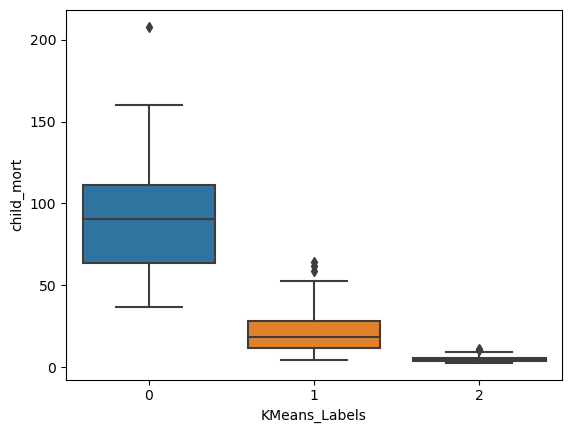

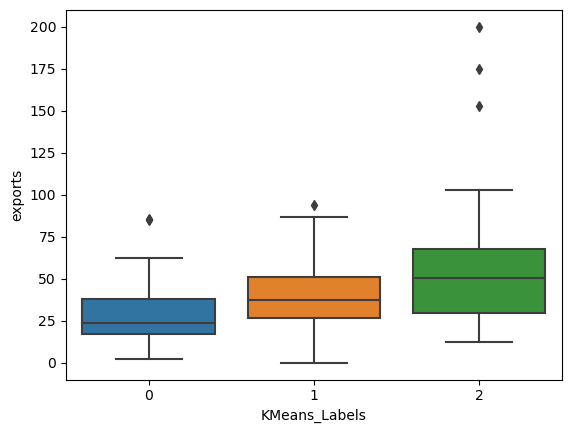

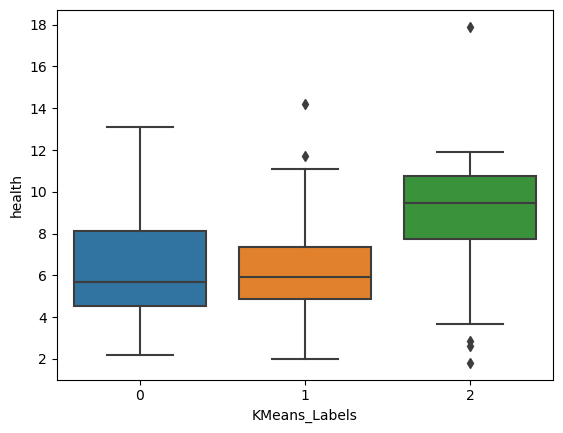

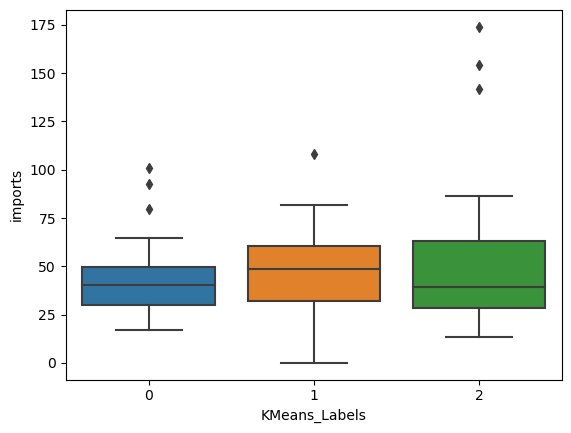

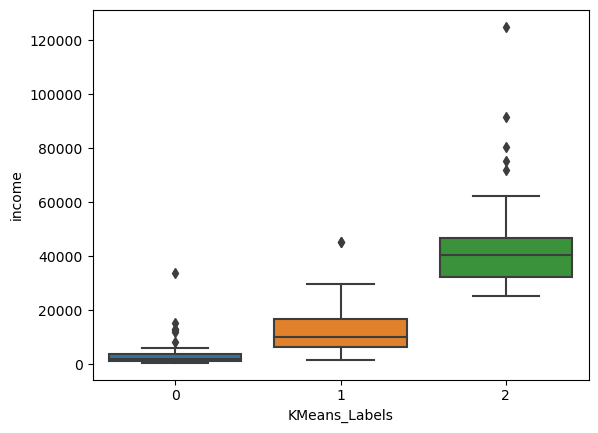

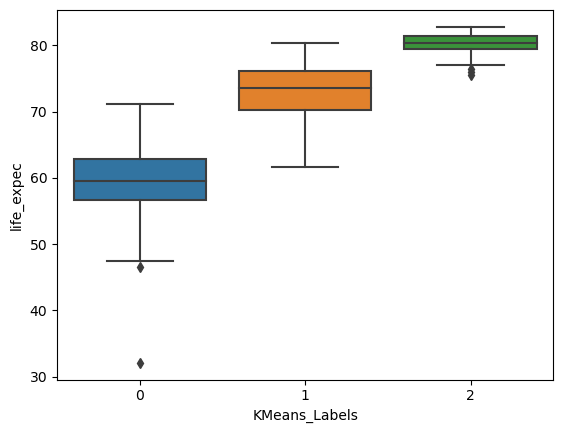

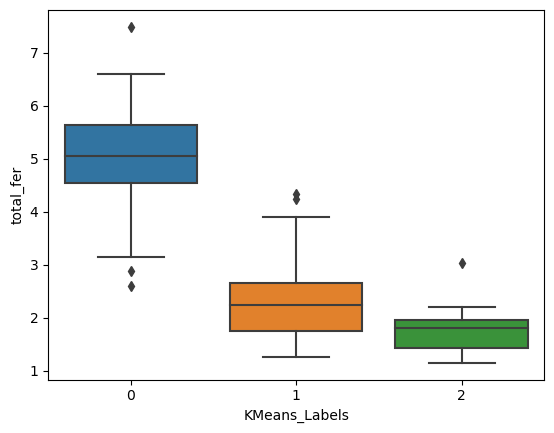

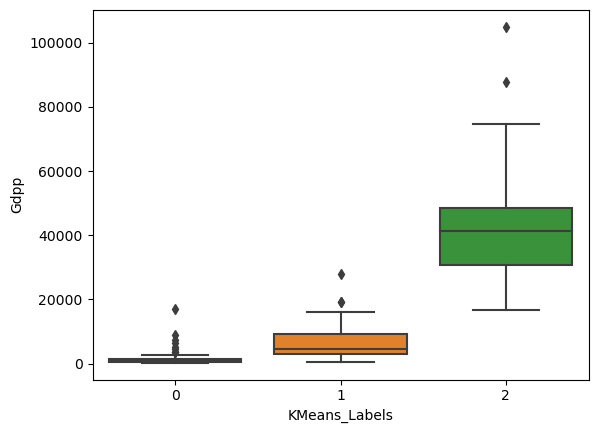

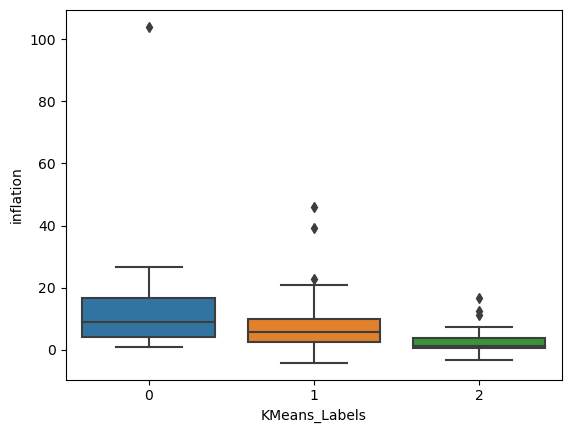

In [100]:
for col in cols_visualise:
    sns.boxplot(x ='KMeans_Labels' ,y =col , data = df )
    plt.show()

## cluster profile 
1. cluster 2 as only 3 observation , as observed from the scatter plots abd the boxplots , this group consists of outliers high income 
2. cluster 1 seems to have countries with less desirable values of many indicators , these countries seems to haver the highest inflation rate , the lowest GDP per capita .

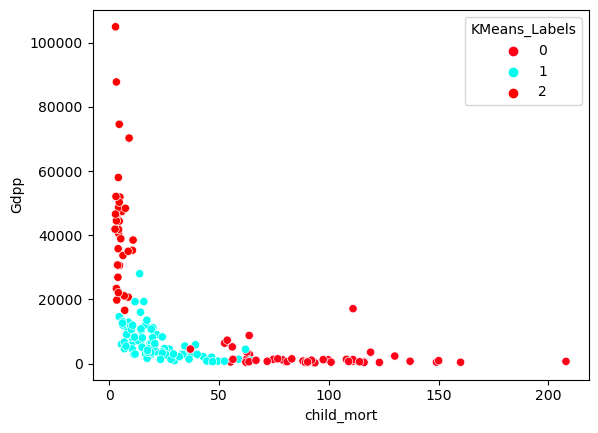

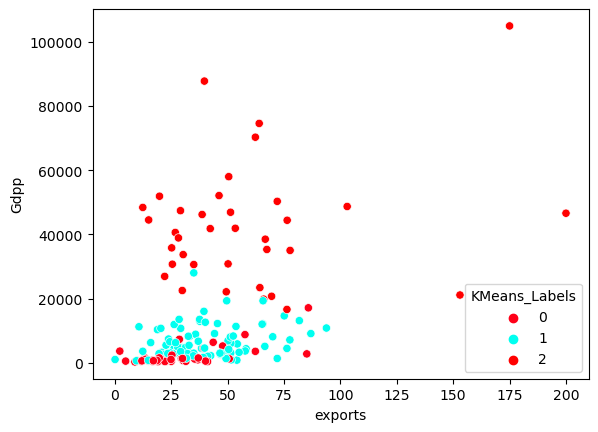

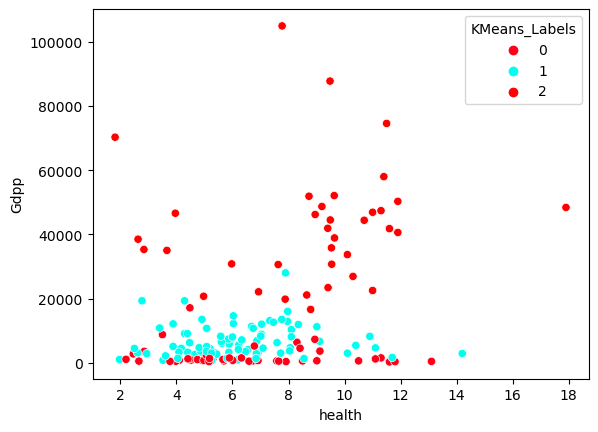

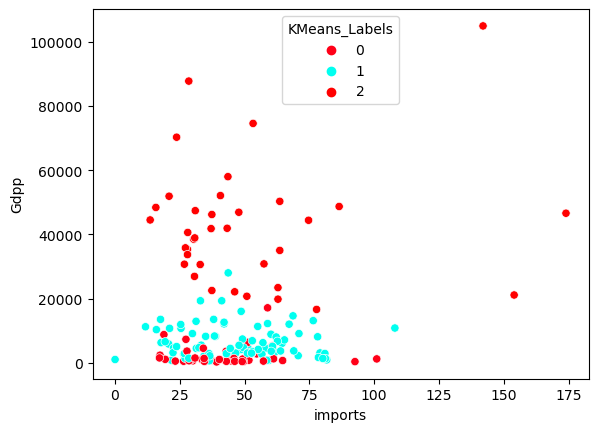

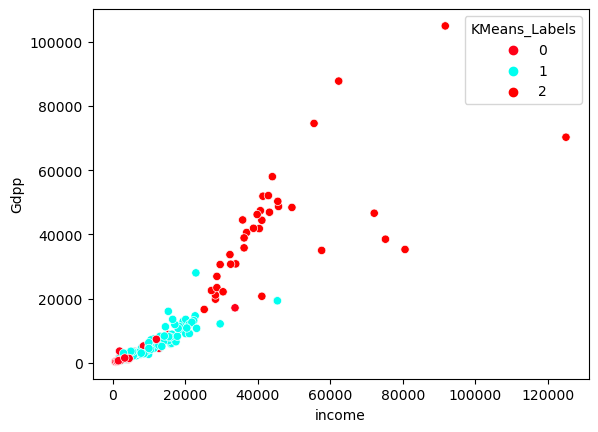

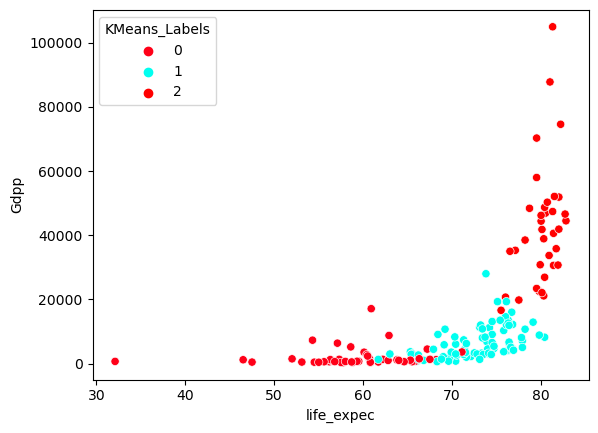

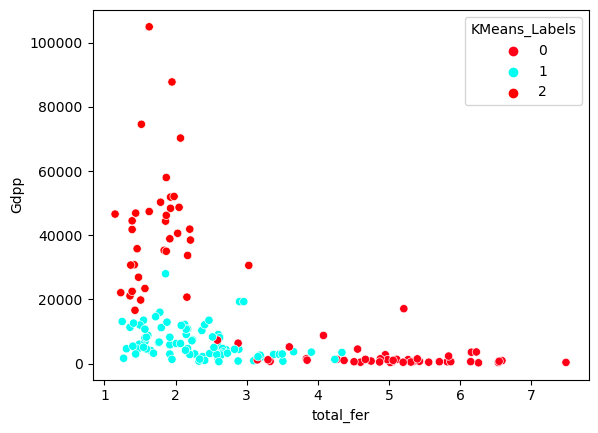

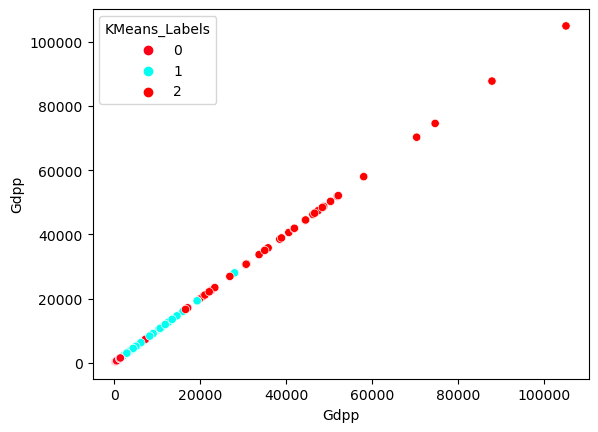

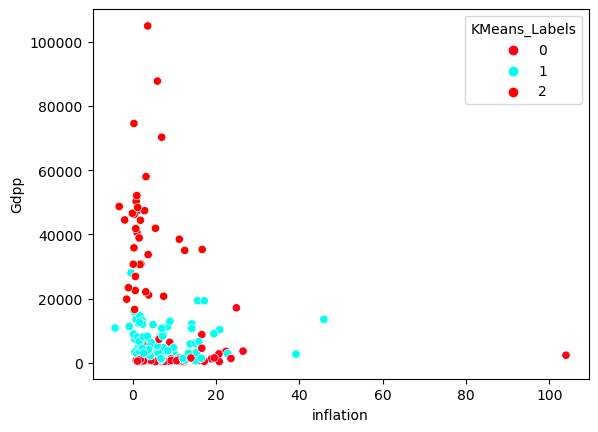

In [108]:
for col in cols_visualise:
    sns.scatterplot(x =col  ,y ='Gdpp' , data = df  , hue = 'KMeans_Labels' , palette= 'hsv_r')
    plt.show()